In [1]:
import pandas as pd

In [2]:
path_x = '/Users/akhildevarashetti/code/lexical_lab/exp/sc_rna/data/data_tr.txt'
path_y = '/Users/akhildevarashetti/code/lexical_lab/exp/sc_rna/data/gene_names.txt'

In [7]:
xs = pd.read_csv(path_x, delimiter='\t', header=None, index_col=False)

In [ ]:
xs_full = xs

In [8]:
xs.shape

(13177, 13166)

In [9]:
xs.columns[:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [10]:
xs.iloc[0][:10]

0    0.000000
1    0.647063
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: 0, dtype: float64

## Approach #1

Try looking at the mean and std of all rows per column.

Histogram of means
Histogram of stds

Now do mean and std of means of all columns.
Now do mean and std of stds of all columns.

First do all of this on a subset.


In [28]:
xs = xs_full

In [23]:
xs = xs[xs.columns[:10]]
xs = xs[:100]
len(xs), len(xs.columns)

(100, 10)

In [25]:
xs.mean()
xs.std()

0    0.263832
1    0.262508
2    0.000000
3    0.000000
4    0.096556
5    0.155452
6    0.229865
7    0.040645
8    0.162609
9    0.083714
dtype: float64

<AxesSubplot:>

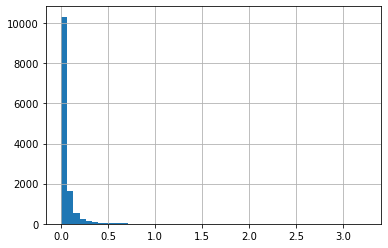

In [30]:
xs.mean().hist(bins=50)

<AxesSubplot:>

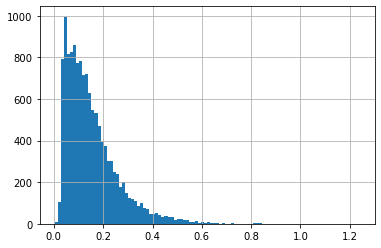

In [32]:
xs.std().hist(bins=100)

In [34]:
(xs.std() == 0).sum()

0

In [35]:
xsn = (xs - xs.mean()) / xs.std()

<AxesSubplot:>

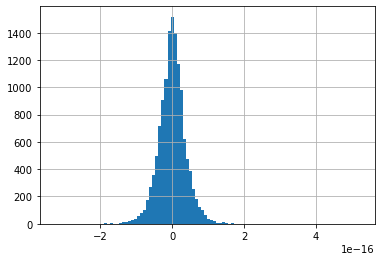

In [37]:
xsn.mean().hist(bins=100)

<AxesSubplot:>

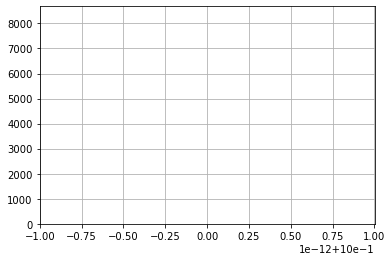

In [38]:
xsn.std().hist(bins=100)

In [40]:
from sklearn.cluster import ward_tree

In [44]:
clusters = ward_tree(xsn.to_numpy(), n_clusters=16)

/var/folders/qz/8lxmcg3s6ls7rqr51bjgj4080000gp/T/ipykernel_73529/2815150118.py:1: UserWarning: Partial build of the tree is implemented only for structured clustering (i.e. with explicit connectivity). The algorithm will build the full tree and only retain the lower branches required for the specified number of clusters
  clusters = ward_tree(xsn.to_numpy(), n_clusters=16)


In [50]:
clusters[0].shape

(13176, 2)

In [51]:
clusters[0][0]

array([ 5451, 13079])

In [53]:
def get_score(predictions):
    import json
    import requests

    url = "https://www.csci555competition.online/score"

    payload = json.dumps(predictions.tolist())
    headers = {"Content-Type": "application/json"}

    response = requests.request("POST", url, headers=headers, data=payload)

    print(response.text)
    return response.text

In [55]:
get_score(clusters[0][:, 0])

KeyboardInterrupt: 

In [56]:
import numpy as np
rand_clusters = np.random.randint(low=0, high=16, size=13177)

In [57]:
get_score(rand_clusters)

0.00018466333322479731



'0.00018466333322479731\n'

## Agglomerative cluster

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
clusters_agg = AgglomerativeClustering(n_clusters=16).fit(xsn)

In [62]:
clusters_agg.labels_.shape

(13177,)

In [63]:
get_score(clusters_agg.labels_)

0.3559180962078749



'0.3559180962078749\n'